# Assignment  on Linear Regression
* Regression analysis is likely the first and simplest of all of predictive models
* Very easy to interpret and can be classified as a supervised learning algorithms
* It estimates the relationship between a dependent variable we can also call it as target (y) & an independent variables ($x_{i}$) which is also known as predictor variables


$$y^{model}=\beta_{0}+\beta_{1}x_{1} + \beta_{2}x_{2} + .......+ \beta_{n}x_{n}$$
where, $\beta_{i}$ are the coefficients we need to determine.

-------------------------------------------------------------------------

## The Cost function

Lets us define the error as:

$$e_{i} = y_{i}^{actual} - y_{i}^{model}$$ 

From this error definition, we can find the expression for mean of square of error terms (also called cost function) for all data points as:

$$cost function \ (Mean \ Squared \ error) = \frac{1}{2n}\sum\limits_{i=1}^n e_{i}^2 = \frac{1}{2n} \sum\limits_{i=1}^n (y_{i}^{actual} - y_{i}^{model})^2$$

Linear regression looks for optimizing the coefficients ($\beta_{i}$) such that the cost function is minimized. 

For the minimization problem, you will use **Gradient Descent** method

-------------------------------------------------------------------------

# Questions
- <a href="#question1"> Question 1 (Summary and Visualization) </a>
- <a href="#question2"> Question 2 (Simple Linear Regression)  </a>
- <a href="#question3"> Question 3 (Regression Assumptions) </a>
- <a href="#question4"> Question 4 (Hypothesis Test)  </a>
- <a href="#question5"> Question 5 (Multivariate Analysis)</a>

***
#### Import libraries here you need to solve this Assignment:

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## Load the dataset
#### 'car_price1.csv' data set contains information about various features('boreratio', 'carlength', 'horsepower' etc) of cars and their 'prices'.
**'price' is dependent variable(y) whereas rest all columns are independent variables(x).**

In [2]:
# Reading the csv file named car_price1.csv
df = pd.read_csv("car_price1.csv")
df.head()

,boreratio,carlength,carwidth,compressionratio,enginesize,citympg,stroke,horsepower,highwaympg,price
0,3.47,168.8,64.1,22.1,130,21,69.2,111,27,13495.0
1,3.47,168.8,64.1,10.4,130,21,45.1,111,27,16500.0
2,2.68,171.2,65.5,12.0,152,19,69.3,154,26,16500.0
3,3.19,176.6,66.2,16.5,109,24,58.5,102,30,13950.0
4,3.19,176.6,66.4,17.9,136,18,58.4,115,22,17450.0


-------------------------------------------------------------------------

<a id='question1'></a>
<font color='red' size=5>Question-1 (Summary and Visualization)</font>
1. Is there any missing or duplicate row present in 'car_price1.csv' file. Check it and delete those rows.
2. Do some Exploratory data analysis, like draw different plots which you might think can be informative (histograms, boxplots, scatter plots).
3. Make a box plot with all features on X-axis and price on Y-axis, all together in one plot (use seaborn library to plot this).
4. Draw pairplot  and heatmap between features.
5. Comment which features have significant correlation (95% significant::0.35).

Question 1-1 
Is there any missing or duplicate row present in 'car_price1.csv' file. Check it and delete those rows.

In [3]:
# finding missing data
missing_data = df.isnull()
missing_data

,boreratio,carlength,carwidth,compressionratio,enginesize,citympg,stroke,horsepower,highwaympg,price
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False


In [4]:
# Finding the total number of NaN (null) values in a each column 
df.isnull().sum()

boreratio           0
carlength           0
carwidth            0
compressionratio    0
enginesize          0
citympg             0
stroke              0
horsepower          0
highwaympg          0
price               0
dtype: int64

In [5]:
# Cheacking is duplicate values present in dataframe df or not
df.duplicated().value_counts()

False    205
dtype: int64

In the above dataset there is neither a null values nor a duplicate values  

Question 1-2 Do some Exploratory data analysis, like draw different plots which you might think can be informative 
(histograms, boxplots, scatter plots).

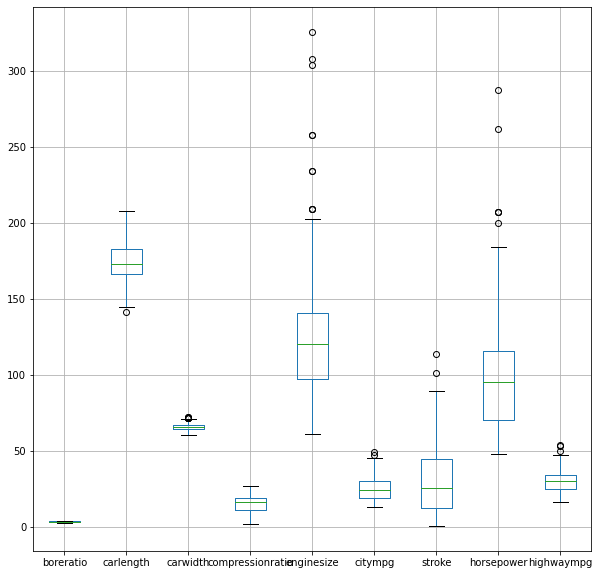

In [6]:
#  Exploratory data analysis using box plot
fig = plt.figure(figsize=(10,10))
boxplot = df.boxplot(column=['boreratio','carlength','carwidth','compressionratio','enginesize','citympg','stroke','horsepower','highwaympg'])

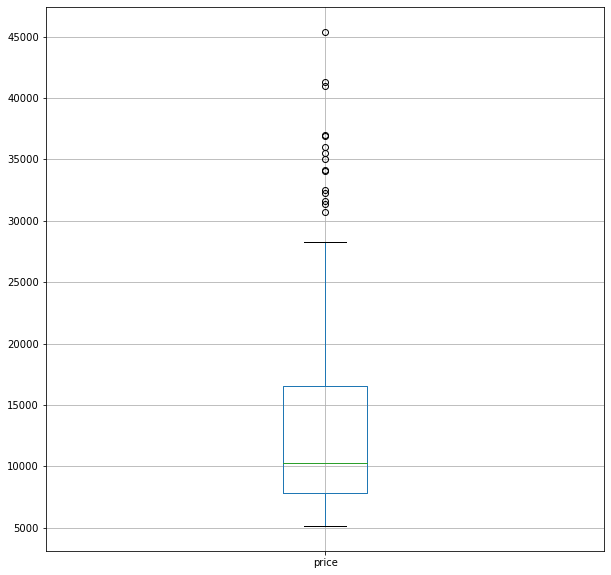

In [7]:
#  Exploratory data analysis using box plot
fig = plt.figure(figsize=(10,10))
boxplot = df.boxplot(column=['price'])

After analysing data we can see that following columns "carlength", "carwidth", "enginesize", "citympg", "stroke", 
"horsepower", "highwaympg", "price" have outliers.

Question 1-3 Make a box plot with all features on X-axis and price on Y-axis, all together in one plot 
(use seaborn library to plot this).

<AxesSubplot:xlabel='boreratio', ylabel='price'>

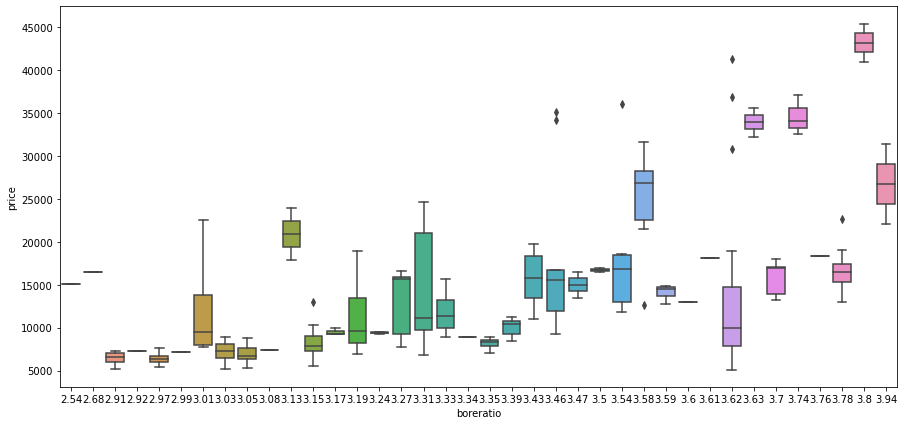

In [8]:
# boxplot between independent variavle (columns) "boreratio" and  dependent variable "price"
fig = plt.figure(figsize=(15,7))
sns.boxplot(x=df['boreratio'], y=df['price'])

<AxesSubplot:xlabel='carlength', ylabel='price'>

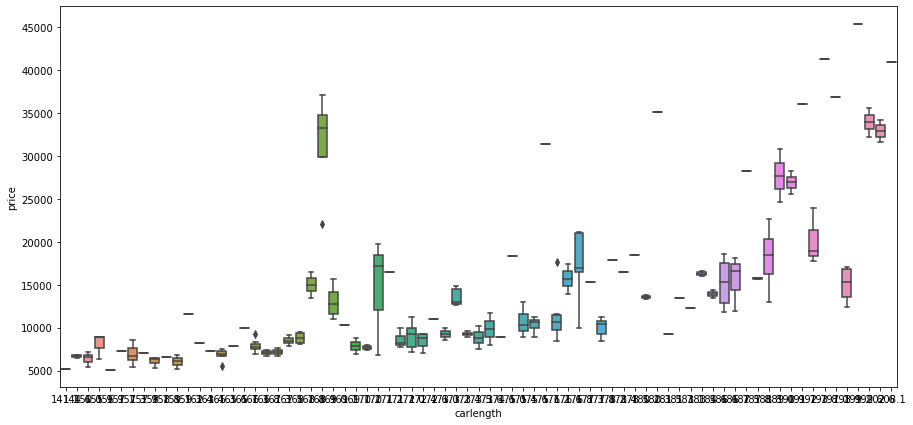

In [9]:
# boxplot between independent variavle (columns) "carlength" and  dependent variable "price"
fig = plt.figure(figsize=(15,7))
sns.boxplot(x=df['carlength'], y=df['price'])

<AxesSubplot:xlabel='carwidth', ylabel='price'>

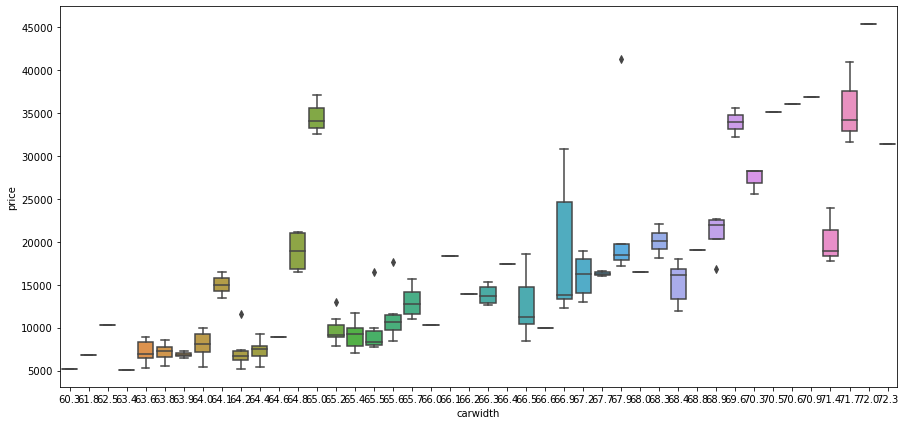

In [10]:
# boxplot between independent variavle (columns) "carwidth" and  dependent variable "price"
fig = plt.figure(figsize=(15,7))
sns.boxplot(x=df['carwidth'], y=df['price'])

<AxesSubplot:xlabel='compressionratio', ylabel='price'>

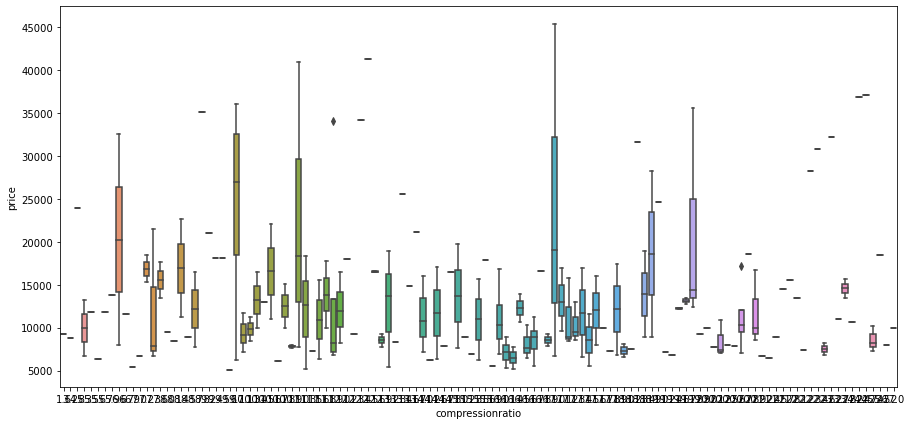

In [11]:
# boxplot between independent variavle (columns) "compressionratio" and  dependent variable "price"
fig = plt.figure(figsize=(15,7))
sns.boxplot(x=df['compressionratio'], y=df['price'])

<AxesSubplot:xlabel='enginesize', ylabel='price'>

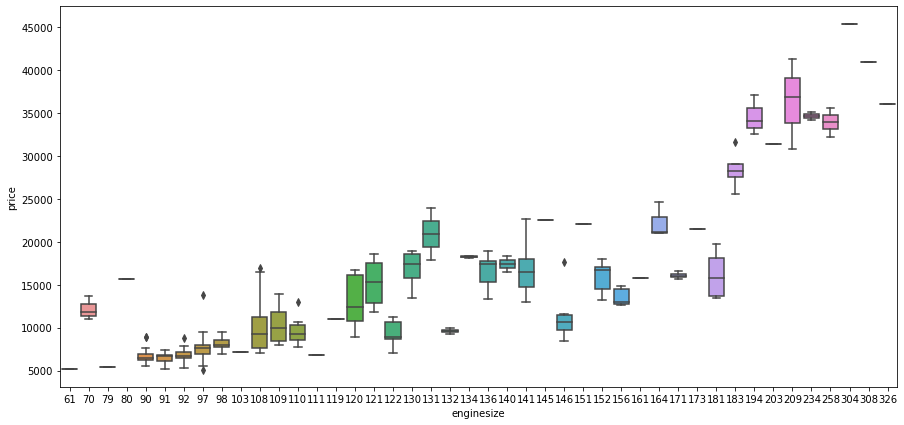

In [12]:
# boxplot between independent variavle (columns) "enginesize" and  dependent variable "price"
fig = plt.figure(figsize=(15,7))
sns.boxplot(x=df['enginesize'], y=df['price'])

<AxesSubplot:xlabel='citympg', ylabel='price'>

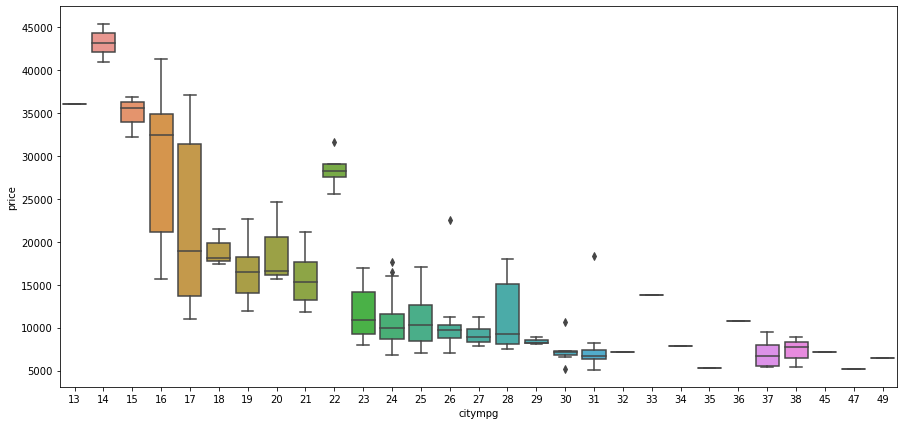

In [13]:
# boxplot between independent variavle (columns) "citympg" and  dependent variable "price"
fig = plt.figure(figsize=(15,7))
sns.boxplot(x=df['citympg'], y=df['price'])

<AxesSubplot:xlabel='stroke', ylabel='price'>

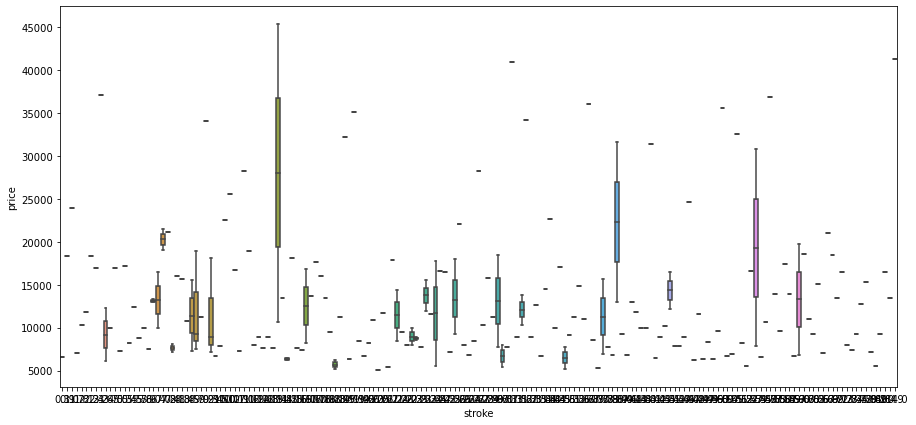

In [14]:
# boxplot between independent variavle (columns) "stroke" and  dependent variable "price"
fig = plt.figure(figsize=(15,7))
sns.boxplot(x=df['stroke'], y=df['price'])

<AxesSubplot:xlabel='horsepower', ylabel='price'>

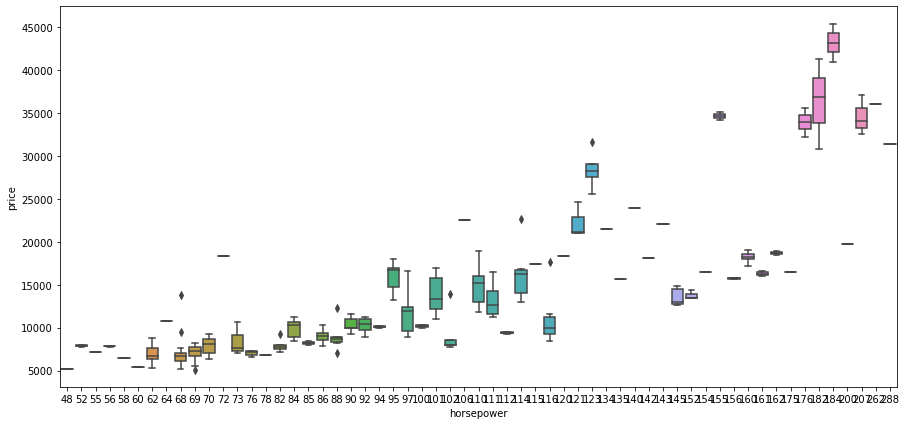

In [15]:
# boxplot between independent variavle (columns) "horespower" and  dependent variable "price"
fig = plt.figure(figsize=(15,7))
sns.boxplot(x=df['horsepower'], y=df['price'])

<AxesSubplot:xlabel='highwaympg', ylabel='price'>

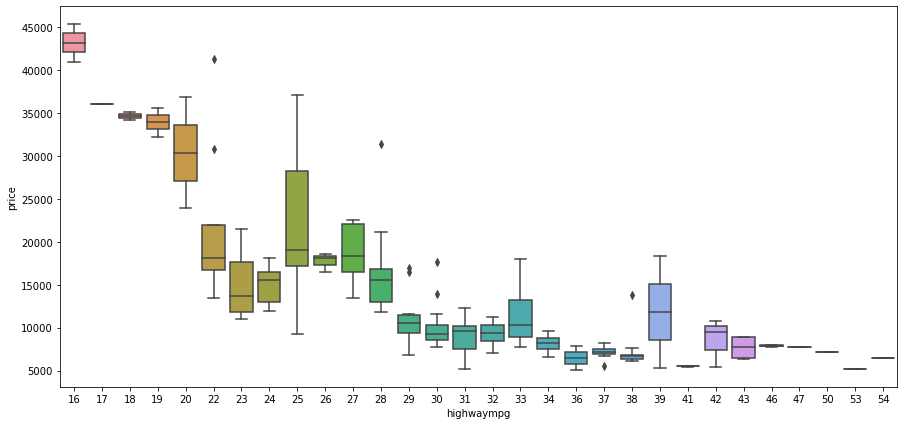

In [16]:
# boxplot between independent variavle (columns) "highwaympg" and  dependent variable "price"
fig = plt.figure(figsize=(15,7))
sns.boxplot(x=df['highwaympg'], y=df['price'])

Question 1-4 Draw pairplot and heatmap between features.

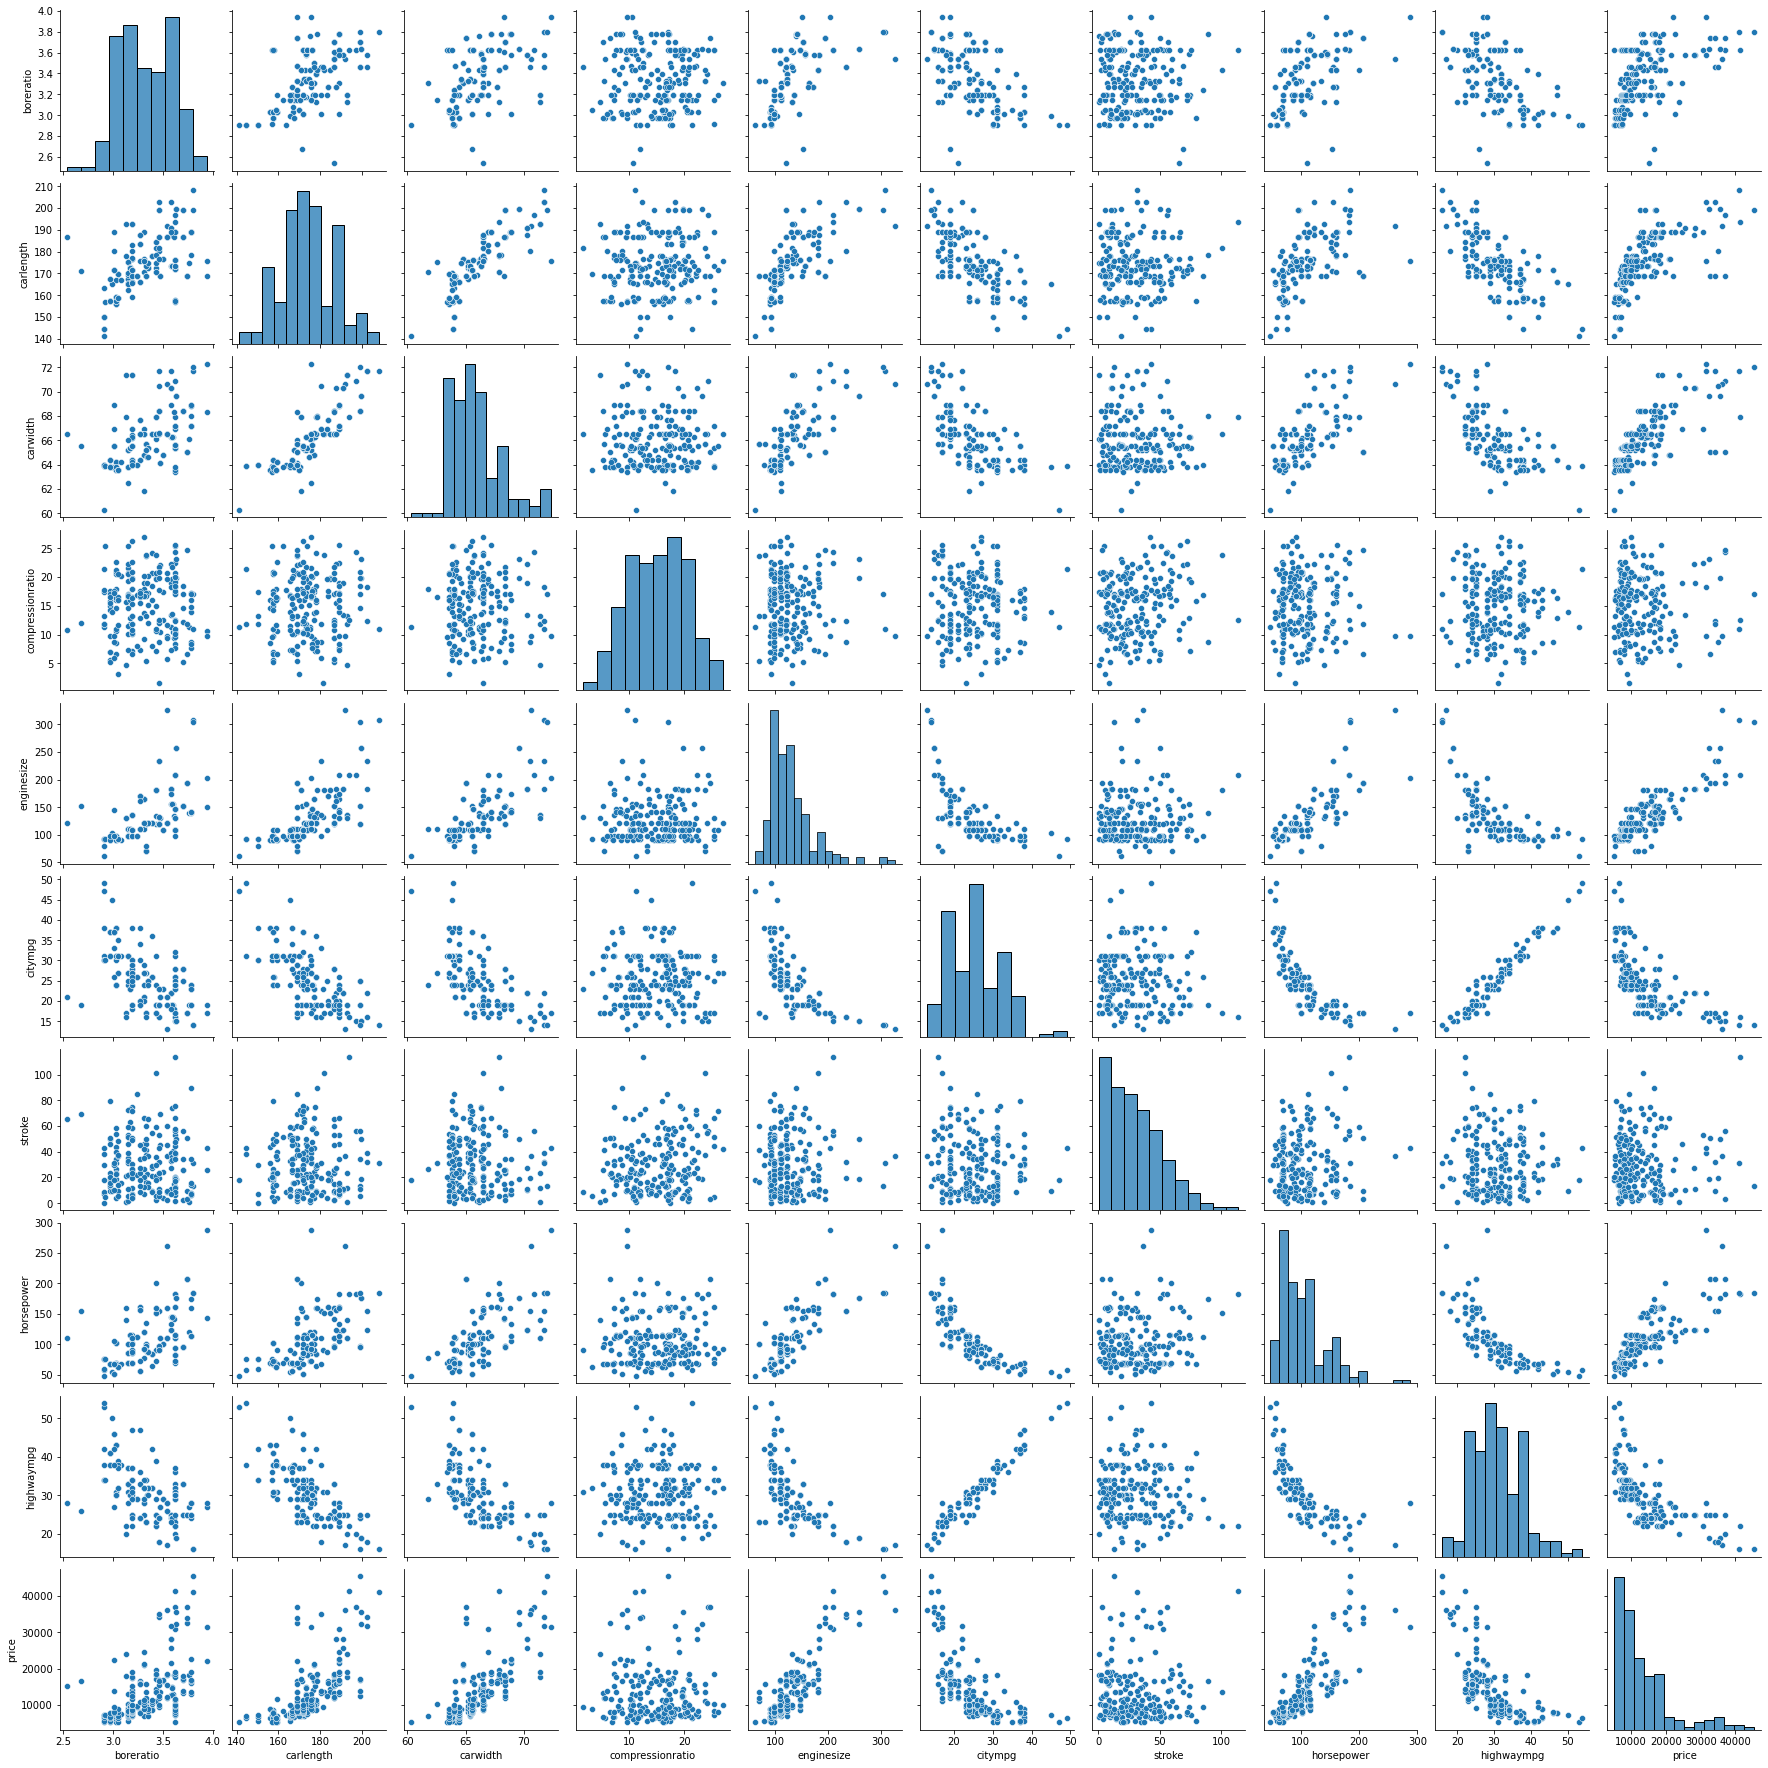

In [17]:
# pairplot of the dataset
sns.pairplot(df)

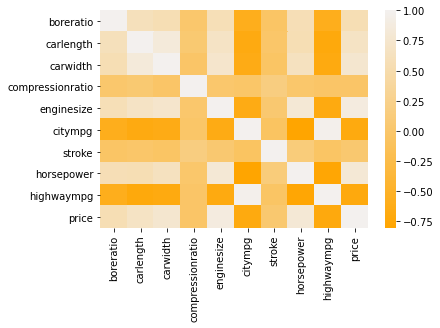

In [18]:
# heatmap of the dataframe
sns.heatmap(df.corr(),cmap=sns.light_palette("orange", as_cmap=True, reverse=True))
plt.show()

Question 1-5 Comment which features have significant correlation (95% significant::0.35).

In [19]:
# Correlation of the dataframe df
df.corr()

,boreratio,carlength,carwidth,compressionratio,enginesize,citympg,stroke,horsepower,highwaympg,price
boreratio,1.000000,0.606454,0.559150,0.012956,0.583774,-0.584532,-0.038913,0.573677,-0.587012,0.553173
carlength,0.606454,1.000000,0.841118,0.056358,0.683360,-0.670909,-0.010558,0.552623,-0.704662,0.682920
carwidth,0.559150,0.841118,1.000000,-0.022720,0.735433,-0.642704,-0.042742,0.640732,-0.677218,0.759325
compressionratio,0.012956,0.056358,-0.022720,1.000000,0.009533,-0.015867,0.163572,0.004385,-0.022544,-0.022559
enginesize,0.583774,0.683360,0.735433,0.009533,1.000000,-0.653658,0.047949,0.809769,-0.677470,0.874145
citympg,-0.584532,-0.670909,-0.642704,-0.015867,-0.653658,1.000000,-0.063564,-0.801456,0.971337,-0.685751
stroke,-0.038913,-0.010558,-0.042742,0.163572,0.047949,-0.063564,1.000000,0.126185,-0.045609,0.037981
horsepower,0.573677,0.552623,0.640732,0.004385,0.809769,-0.801456,0.126185,1.000000,-0.770544,0.808139
highwaympg,-0.587012,-0.704662,-0.677218,-0.022544,-0.677470,0.971337,-0.045609,-0.770544,1.000000,-0.697599
price,0.553173,0.682920,0.759325,-0.022559,0.874145,-0.685751,0.037981,0.808139,-0.697599,1.000000


From the above correlation, we get that the following has good correlation:
1. "boreratio" and "carlength" (0.606454)
2. "carlength" and "carwidth" (0.841118)  
3. "carlength" and "enginesize" (0.683360)
4. "carlength" and "citympg" (-0.670909)
5. "carlength" and "citympg" (-0.670909 )
6."carlength" and "highwaympg" (-0.704662)
7."carlength" and "price" (0.682920)
8. "carwidth" and "enginesize" (0.735433)
9. "carwidth" and "citympg"(-0.642704)
10. "carwidth" and "horsepower"(0.640732)
11. "carwidth" and "citympg"(-0.642704)
12. "carwidth" and "highwaympg"(-0.677218)

Question-2 (Simple Linear regression)

For implementation of this question, create a dataframe 'df1' having columns 'carlength', 'boreratio', 'highwaympg' and 'price'.
1. Split data into train set and test set with default test_size.
2. Fit the regression lines between 'carlength', 'boreratio' and 'highwaympg' with respect to 'price', seperately. Here build your own algorithms for computing cost-function and to optimize the coefficients. For example: As explained in the lecture.
3. Find R^2 score on both train and test set.
4. Which features out of 'carlength', 'boreratio' and 'highwaympg' contribute maximum and least to the price of car?
5. Use stats model library to do Linear regression and compare its results with yours.

-------------------------------------------------------------------------

In [21]:
# Creating a dataframe df1 having columns 'carlength', 'boreratio', 'highwaympg', 'price'
df1=df[['carlength', 'boreratio', 'highwaympg', 'price']]
df1

,carlength,boreratio,highwaympg,price
0,168.8,3.47,27,13495.0
1,168.8,3.47,27,16500.0
2,171.2,2.68,26,16500.0
3,176.6,3.19,30,13950.0
4,176.6,3.19,22,17450.0
...,...,...,...,...
200,188.8,3.78,28,16845.0
201,188.8,3.78,25,19045.0
202,188.8,3.58,23,21485.0
203,188.8,3.01,27,22470.0


In [22]:
# Question2-1 Split data into train set and test set with default test_size.
y= df1.price
 
#input
x=df1.drop('price',axis=1)
 
#splitting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
 
#printing shapes of testing and training sets :
print("shape of original dataset :", df1.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (205, 4)
shape of input - training set (164, 3)
shape of output - training set (164,)
shape of input - testing set (41, 3)
shape of output - testing set (41,)


Question 2-2 Fitting the regression lines between 'carlength', 'boreratio' and 'highwaympg' with respect to 'price', seperately


In [23]:
# Plotting regression line between columns "carlength" and "price"
X = df['carlength'].values
Y = df['price'].values
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
# Total number of values
n = len(X)
# Using the formula to calculate 'm' and 'c'
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)
# Printing coefficients
print("Coefficients")
print(m, c)

Coefficients
442.216062946071 -63690.67161230295


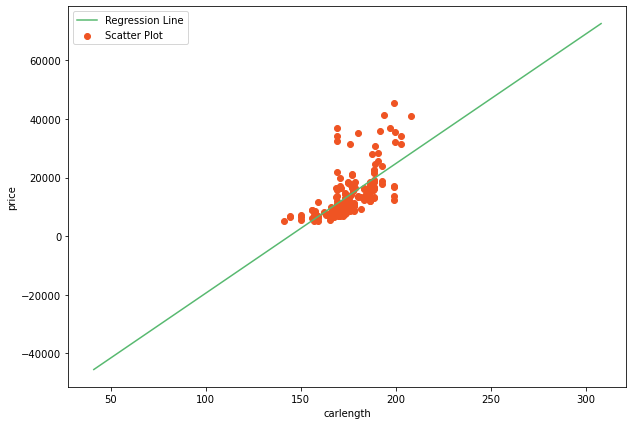

In [24]:
# Plotting Values and Regression Line

max_x = np.max(X) + 100
min_x = np.min(X) - 100
 
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x
 
# Ploting Line
fig = plt.figure(figsize=(10,7))
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
 
plt.xlabel('carlength')
plt.ylabel('price')
plt.legend()
plt.show()

In [25]:
# Plotting regression line between columns "boreratio" and "price"
X = df['boreratio'].values
Y = df['price'].values
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
# Total number of values
n = len(X)
# Using the formula to calculate 'm' and 'c'
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)
# Printing coefficients
print("Coefficients")
print(m, c)

Coefficients
16316.492553151942 -41053.229998934214


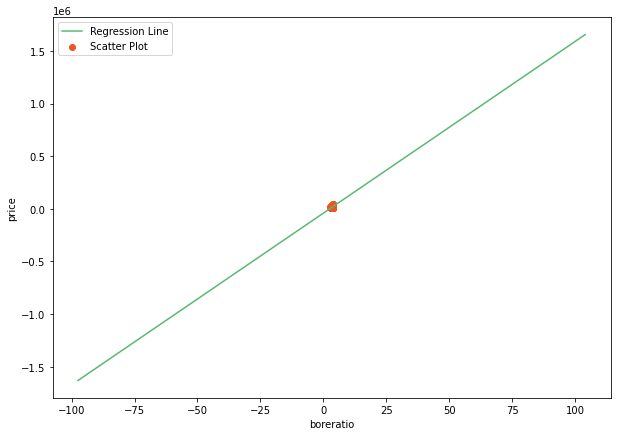

In [26]:
# Plotting Values and Regression Line
max_x = np.max(X) + 100
min_x = np.min(X) - 100
 
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x
 
# Ploting Line
fig = plt.figure(figsize=(10,7))
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
 
plt.xlabel('boreratio')
plt.ylabel('price')
plt.legend()
plt.show()

In [27]:
# Plotting regression line between columns "highwaympg" and "price"
X = df['highwaympg'].values
Y = df['price'].values
# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
# Total number of values
n = len(X)
# Using the formula to calculate 'm' and 'c'
numer = 0
denom = 0
for i in range(n):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
    m = numer / denom
    c = mean_y - (m * mean_x)
# Printing coefficients
print("Coefficients")
print(m, c)

Coefficients
-809.2735282866277 38162.858484482436


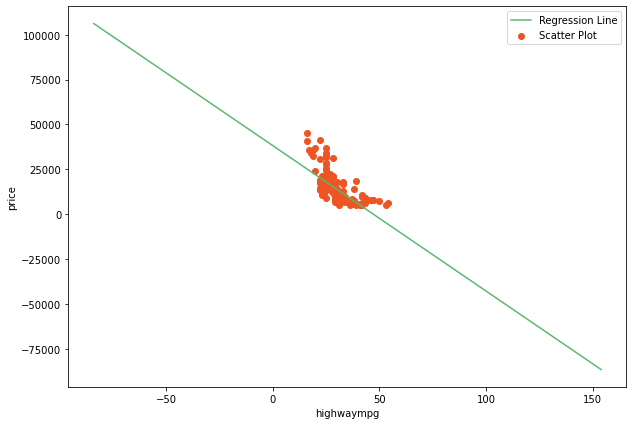

In [28]:
# Plotting Values and Regression Line
max_x = np.max(X) + 100
min_x = np.min(X) - 100
 
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = c + m * x
 
# Ploting Line
fig = plt.figure(figsize=(10,7))
plt.plot(x, y, color='#58b970', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')
 
plt.xlabel('highwaympg')
plt.ylabel('price')
plt.legend()
plt.show()

Question 2-3 Find R^2 score on both train and test set.

In [29]:
# R^2 Score
model = LinearRegression()
X, y = df1[['carlength', 'boreratio', 'highwaympg']], df1.price
model.fit(X, y)
print("R2 score is",model.score(X, y))

R2 score is 0.5678911889147926


Question 2-4 Which features out of 'carlength', 'boreratio' and 'highwaympg' contribute maximum a
nd least to the price of car?

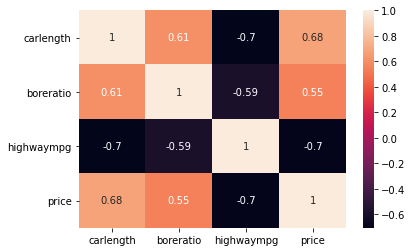

In [30]:
# Using heatmap we get that column "highwaympg " contribute maximum price of car
# Similarly we get that column "boreratio " contribute least to the price of car
sns.heatmap(df1.corr(), annot=True)
plt.show()

Question 2-5 Use stats model library to do Linear regression and compare its results with yours.

In [31]:
# Linear Regression using Stats model library
X1, y = df1[['carlength', 'boreratio', 'highwaympg']], df1.price
X = sm.add_constant(X1) 
results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.561
Method:                 Least Squares   F-statistic:                     88.05
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           2.05e-36
Time:                        20:24:02   Log-Likelihood:                -2046.5
No. Observations:                 205   AIC:                             4101.
Df Residuals:                     201   BIC:                             4114.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.226e+04      1e+04     -2.223      0.027    -4.2e+04   -2513.199
carlength    216.0954     44.920      4.811      0.000     127.521     304.670
boreratio   3570.1444   1793.333      1.991      0.048      33.984    7106.304
highwaympg  -454.0449     79.038     -5.745      0.000    -609.895    -298.194
==============================================================================
Omnibus:                       65.521   Durbin-Watson:                   0.695
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.761
Skew:                           1.507   Prob(JB):                     1.65e-31
Kurtosis:                       5.741   Cond. No.                     4.81e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.81e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

-------------------------------------------------------------------------

<a id='question3'></a>
<font color='red' size=5>Question-3 (Regression assumptions)</font>
#### Use whole dataset for this question:-
#### Target variable is 'price' and rest all are independent variables.
1. Check relationship between the dependent variable and all of independent variables separately. List all independent variables having linear relationship with dependent variable.
2. List the column names having outliers along with their outlier values?
3. Is there any relation between the independent variables. i.e. check for colinearity between the independent features and mention the independent features having colinearity.(With their scatterplots)
4. Do a regression fit between 'enginesize' and plot the residual, do you see errors are gaussian distributed. Use QQplot and histogram of residual to see it?

Question 3-1 Check relationship between the dependent variable and all of independent variables separately.
List all independent variableshaving linear relationship with dependent variable

In [32]:
# Using corretaion cheacking the relationship between the dependent variable "price" and all independent variables
df.corr()

,boreratio,carlength,carwidth,compressionratio,enginesize,citympg,stroke,horsepower,highwaympg,price
boreratio,1.000000,0.606454,0.559150,0.012956,0.583774,-0.584532,-0.038913,0.573677,-0.587012,0.553173
carlength,0.606454,1.000000,0.841118,0.056358,0.683360,-0.670909,-0.010558,0.552623,-0.704662,0.682920
carwidth,0.559150,0.841118,1.000000,-0.022720,0.735433,-0.642704,-0.042742,0.640732,-0.677218,0.759325
compressionratio,0.012956,0.056358,-0.022720,1.000000,0.009533,-0.015867,0.163572,0.004385,-0.022544,-0.022559
enginesize,0.583774,0.683360,0.735433,0.009533,1.000000,-0.653658,0.047949,0.809769,-0.677470,0.874145
citympg,-0.584532,-0.670909,-0.642704,-0.015867,-0.653658,1.000000,-0.063564,-0.801456,0.971337,-0.685751
stroke,-0.038913,-0.010558,-0.042742,0.163572,0.047949,-0.063564,1.000000,0.126185,-0.045609,0.037981
horsepower,0.573677,0.552623,0.640732,0.004385,0.809769,-0.801456,0.126185,1.000000,-0.770544,0.808139
highwaympg,-0.587012,-0.704662,-0.677218,-0.022544,-0.677470,0.971337,-0.045609,-0.770544,1.000000,-0.697599
price,0.553173,0.682920,0.759325,-0.022559,0.874145,-0.685751,0.037981,0.808139,-0.697599,1.000000


From the above correration the list of all independent variables having linear relationship with dependent variable are
"carlength" , "Carwidth", "enginesize", "citympg" , "horsepower" and "highwaympg" have linear relationshop with dependent
variable price.
We can also cheack the same using above pairplot which we find.

Question 3-2 List the column names having outliers along with their outlier values?

<AxesSubplot:xlabel='boreratio'>

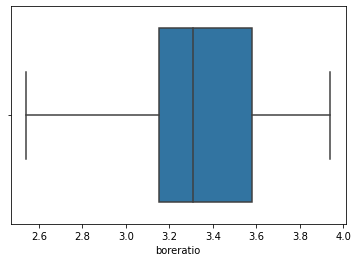

In [33]:
# boxplot of column "boreratio" 
# There is no outlier present in column "boreratio "
sns.boxplot(x=df['boreratio'])

<AxesSubplot:xlabel='carlength'>

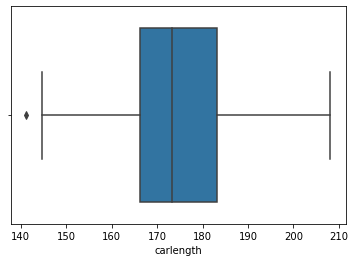

In [34]:
# boxplot of column "carlength" 
# There is outlier present in column "carlength "
sns.boxplot(x=df['carlength'])

In [35]:
# Minimum of carlength
df.carlength.min()

141.1

In [36]:
# maximum of carlength
df.carlength.max()

208.1

In [37]:
# mean of carlength
df.carlength.mean()

174.04926829268305

In [38]:
# Replacing outlier from the mean of the column "carlength"
df['carlength'] = df['carlength'].astype(str).str.replace('141.1', '174.0')
print(df.to_string())

     boreratio carlength  carwidth  compressionratio  enginesize  citympg  stroke  horsepower  highwaympg      price
0         3.47     168.8      64.1              22.1         130       21    69.2         111          27  13495.000
1         3.47     168.8      64.1              10.4         130       21    45.1         111          27  16500.000
2         2.68     171.2      65.5              12.0         152       19    69.3         154          26  16500.000
3         3.19     176.6      66.2              16.5         109       24    58.5         102          30  13950.000
4         3.19     176.6      66.4              17.9         136       18    58.4         115          22  17450.000
5         3.19     177.3      66.3               7.2         136       19    75.0         110          25  15250.000
6         3.19     192.7      71.4              11.8         136       19    23.5         110          25  17710.000
7         3.19     192.7      71.4              13.2         136

<AxesSubplot:xlabel='carwidth'>

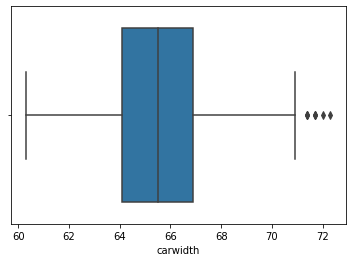

In [39]:
# boxplot of column "carwidth" 
# There is outlier present in column "boreratio "
sns.boxplot(x=df['carwidth'])

In [40]:
# Minimum of carwidth
df.carwidth.min()

60.3

In [41]:
# Maximum of carwidth
df.carwidth.max()

72.3

In [42]:
# Mean of carwidth
df.carwidth.mean()

65.90780487804875

In [43]:
# Replacing outlier from the mean of the column "carwidth"
df['carwidth'] = df['carwidth'].astype(str).str.replace('72', '65')
df['carwidth'] = df['carwidth'].astype(str).str.replace('71.7', '65')
print(df.to_string())

     boreratio carlength carwidth  compressionratio  enginesize  citympg  stroke  horsepower  highwaympg      price
0         3.47     168.8     64.1              22.1         130       21    69.2         111          27  13495.000
1         3.47     168.8     64.1              10.4         130       21    45.1         111          27  16500.000
2         2.68     171.2     65.5              12.0         152       19    69.3         154          26  16500.000
3         3.19     176.6     66.2              16.5         109       24    58.5         102          30  13950.000
4         3.19     176.6     66.4              17.9         136       18    58.4         115          22  17450.000
5         3.19     177.3     66.3               7.2         136       19    75.0         110          25  15250.000
6         3.19     192.7     71.4              11.8         136       19    23.5         110          25  17710.000
7         3.19     192.7     71.4              13.2         136       19

<AxesSubplot:xlabel='compressionratio'>

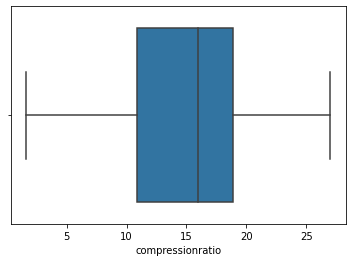

In [44]:
# boxplot of column "compressionratio" 
# There is no outlier present in column "compressionratio "
sns.boxplot(x=df['compressionratio'])

<AxesSubplot:xlabel='enginesize'>

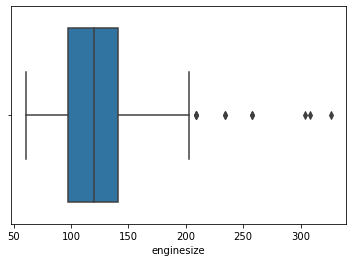

In [45]:
# boxplot of column "enginesize" 
# There is outlier present in column "enginesize "
sns.boxplot(x=df['enginesize'])

In [46]:
# Minimum of enginesize
df.enginesize.min()

61

In [47]:
# Maximum of enginesize
df.enginesize.max()

326

In [48]:
# Mean of enginesize
df.enginesize.mean()

126.90731707317073

In [49]:
# replacing outliers from the mean value of enginesize
df['enginesize'] = df['enginesize'].astype(str).str.replace('209', '126.9')
df['enginesize'] = df['enginesize'].astype(str).str.replace('258', '126.9')
df['enginesize'] = df['enginesize'].astype(str).str.replace('326', '126.9')
df['enginesize'] = df['enginesize'].astype(str).str.replace('234', '126.9')
df['enginesize'] = df['enginesize'].astype(str).str.replace('308', '126.9')
df['enginesize'] = df['enginesize'].astype(str).str.replace('304', '126.9')
print(df.to_string())

     boreratio carlength carwidth  compressionratio enginesize  citympg  stroke  horsepower  highwaympg      price
0         3.47     168.8     64.1              22.1        130       21    69.2         111          27  13495.000
1         3.47     168.8     64.1              10.4        130       21    45.1         111          27  16500.000
2         2.68     171.2     65.5              12.0        152       19    69.3         154          26  16500.000
3         3.19     176.6     66.2              16.5        109       24    58.5         102          30  13950.000
4         3.19     176.6     66.4              17.9        136       18    58.4         115          22  17450.000
5         3.19     177.3     66.3               7.2        136       19    75.0         110          25  15250.000
6         3.19     192.7     71.4              11.8        136       19    23.5         110          25  17710.000
7         3.19     192.7     71.4              13.2        136       19    11.6 

<AxesSubplot:xlabel='citympg'>

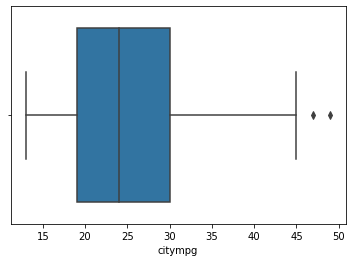

In [50]:
# boxplot of column "citympg" 
# There is outlier present in column "citympg "
sns.boxplot(x=df['citympg'])

In [51]:
# Minimum of citympg
df.citympg.min()

13

In [52]:
# Maximum of citympg
df.citympg.max()

49

In [53]:
# Mean of citympg
df.citympg.mean()

25.21951219512195

In [54]:
# value count of citympg
df['citympg'].value_counts()

31    28
19    27
24    22
27    14
17    13
26    12
23    12
21     8
30     8
25     8
38     7
28     7
37     6
16     6
22     4
15     3
18     3
29     3
20     3
14     2
49     1
47     1
32     1
33     1
34     1
35     1
36     1
45     1
13     1
Name: citympg, dtype: int64

In [55]:
# replacing outliers value with mean of citympg
df['citympg'] = df['citympg'].astype(str).str.replace('45', '25.21')
df['citympg'] = df['citympg'].astype(str).str.replace('47', '25.21')
df['citympg'] = df['citympg'].astype(str).str.replace('49', '25.21')
print(df.to_string())

     boreratio carlength carwidth  compressionratio enginesize citympg  stroke  horsepower  highwaympg      price
0         3.47     168.8     64.1              22.1        130      21    69.2         111          27  13495.000
1         3.47     168.8     64.1              10.4        130      21    45.1         111          27  16500.000
2         2.68     171.2     65.5              12.0        152      19    69.3         154          26  16500.000
3         3.19     176.6     66.2              16.5        109      24    58.5         102          30  13950.000
4         3.19     176.6     66.4              17.9        136      18    58.4         115          22  17450.000
5         3.19     177.3     66.3               7.2        136      19    75.0         110          25  15250.000
6         3.19     192.7     71.4              11.8        136      19    23.5         110          25  17710.000
7         3.19     192.7     71.4              13.2        136      19    11.6         1

<AxesSubplot:xlabel='stroke'>

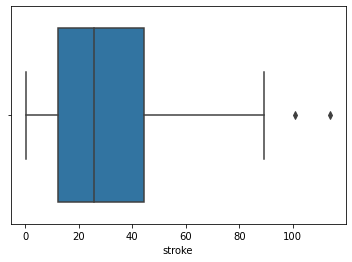

In [56]:
# boxplot of column "stroke" 
# There is outlier present in column "stroke "
sns.boxplot(x=df['stroke'])

In [58]:
# Minimum of stroke
df.stroke.min()

0.3

In [59]:
# Maximum of stroke
df.stroke.max()

114.0

In [60]:
# Mean of stroke
df.stroke.mean()

30.16975609756097

In [61]:
# value count of stroke
c=df['stroke'].value_counts()
print(c.to_string())

8.7      3
9.3      3
25.6     3
22.9     2
6.0      2
52.9     2
45.1     2
34.6     2
3.6      2
59.0     2
18.3     2
37.7     2
16.0     2
31.6     2
23.2     2
22.3     2
7.4      2
29.7     2
7.0      2
8.5      2
30.0     2
14.2     2
13.1     2
23.5     2
6.4      2
21.4     2
38.7     2
23.1     1
48.7     1
66.2     1
74.2     1
21.6     1
2.4      1
39.6     1
20.7     1
13.8     1
50.4     1
63.2     1
14.8     1
36.8     1
34.4     1
43.3     1
26.4     1
40.8     1
37.9     1
65.9     1
15.6     1
55.8     1
27.3     1
1.7      1
50.6     1
52.7     1
58.7     1
15.9     1
35.7     1
17.0     1
5.3      1
5.5      1
1.8      1
33.0     1
32.5     1
11.0     1
60.0     1
18.5     1
31.5     1
32.0     1
5.0      1
19.5     1
114.0    1
46.0     1
4.0      1
1.0      1
75.0     1
22.0     1
56.5     1
34.0     1
36.9     1
10.0     1
20.3     1
45.9     1
28.9     1
12.4     1
50.5     1
72.3     1
89.4     1
9.5      1
37.0     1
51.4     1
9.0      1
20.5     1
43.0     1

In [62]:
#replacing the outlier with the mean of stroke
df['stroke'] = df['stroke'].astype(str).str.replace('114.0', '30.16')
df['stroke'] = df['stroke'].astype(str).str.replace('100.9', '30.16')
print(df.to_string())

     boreratio carlength carwidth  compressionratio enginesize citympg stroke  horsepower  highwaympg      price
0         3.47     168.8     64.1              22.1        130      21   69.2         111          27  13495.000
1         3.47     168.8     64.1              10.4        130      21   45.1         111          27  16500.000
2         2.68     171.2     65.5              12.0        152      19   69.3         154          26  16500.000
3         3.19     176.6     66.2              16.5        109      24   58.5         102          30  13950.000
4         3.19     176.6     66.4              17.9        136      18   58.4         115          22  17450.000
5         3.19     177.3     66.3               7.2        136      19   75.0         110          25  15250.000
6         3.19     192.7     71.4              11.8        136      19   23.5         110          25  17710.000
7         3.19     192.7     71.4              13.2        136      19   11.6         110       

<AxesSubplot:xlabel='horsepower'>

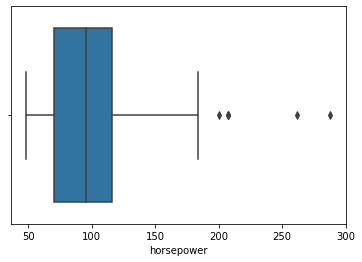

In [63]:
# boxplot of column "horsepower" 
# There is outlier present in column "horsepower "
sns.boxplot(x=df['horsepower'])

In [64]:
# Minimum of horsepower
df.horsepower.min()

48

In [65]:
# maximum of horsepower
df.horsepower.max()

288

In [66]:
# mean of horsepower
df.horsepower.mean()

104.1170731707317

In [67]:
# value count of horsepower
df.horsepower.value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
160     6
101     6
114     6
102     5
90      5
82      5
145     5
84      5
76      5
97      5
123     4
86      4
92      4
111     4
85      3
73      3
207     3
182     3
121     3
152     3
112     2
184     2
162     2
161     2
156     2
155     2
176     2
94      2
56      2
100     2
52      2
175     1
60      1
64      1
55      1
48      1
288     1
58      1
78      1
72      1
115     1
154     1
143     1
142     1
140     1
135     1
134     1
200     1
106     1
120     1
262     1
Name: horsepower, dtype: int64

In [68]:
# Replacing the outliers with the mean of horsepower
df['horsepower'] = df['horsepower'].astype(str).str.replace('207', '104.1')
df['horsepower'] = df['horsepower'].astype(str).str.replace('200', '104.1')
df['horsepower'] = df['horsepower'].astype(str).str.replace('262', '104.1')
df['horsepower'] = df['horsepower'].astype(str).str.replace('288', '104.1')
print(df.to_string())

     boreratio carlength carwidth  compressionratio enginesize citympg stroke horsepower  highwaympg      price
0         3.47     168.8     64.1              22.1        130      21   69.2        111          27  13495.000
1         3.47     168.8     64.1              10.4        130      21   45.1        111          27  16500.000
2         2.68     171.2     65.5              12.0        152      19   69.3        154          26  16500.000
3         3.19     176.6     66.2              16.5        109      24   58.5        102          30  13950.000
4         3.19     176.6     66.4              17.9        136      18   58.4        115          22  17450.000
5         3.19     177.3     66.3               7.2        136      19   75.0        110          25  15250.000
6         3.19     192.7     71.4              11.8        136      19   23.5        110          25  17710.000
7         3.19     192.7     71.4              13.2        136      19   11.6        110          25  18

<AxesSubplot:xlabel='highwaympg'>

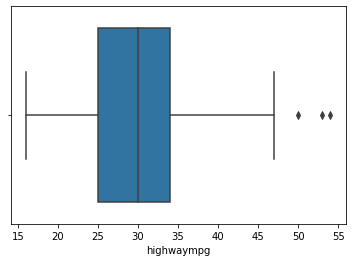

In [69]:
# boxplot of column "highwaympg" 
# There is outlier present in column "highwaympg "
sns.boxplot(x=df['highwaympg'])

In [70]:
# minimum of highwaympg
df.highwaympg.min()

16

In [71]:
# maximum of highwaympg
df.highwaympg.max()

54

In [72]:
# mean of highwaympg
df.highwaympg.mean()

30.75121951219512

In [73]:
# value count of highwaympg
df.highwaympg.value_counts()

25    19
24    17
38    17
30    16
32    16
34    14
37    13
28    13
29    10
33     9
31     8
22     8
23     7
27     5
43     4
41     3
42     3
26     3
20     2
19     2
18     2
16     2
36     2
39     2
46     2
47     2
53     1
50     1
17     1
54     1
Name: highwaympg, dtype: int64

In [74]:
# replacing the outlier value with the mean of highwaympg
df['highwaympg'] = df['highwaympg'].astype(str).str.replace('50', '30.75')
df['highwaympg'] = df['highwaympg'].astype(str).str.replace('54', '30.75')
print(df.to_string())

     boreratio carlength carwidth  compressionratio enginesize citympg stroke horsepower highwaympg      price
0         3.47     168.8     64.1              22.1        130      21   69.2        111         27  13495.000
1         3.47     168.8     64.1              10.4        130      21   45.1        111         27  16500.000
2         2.68     171.2     65.5              12.0        152      19   69.3        154         26  16500.000
3         3.19     176.6     66.2              16.5        109      24   58.5        102         30  13950.000
4         3.19     176.6     66.4              17.9        136      18   58.4        115         22  17450.000
5         3.19     177.3     66.3               7.2        136      19   75.0        110         25  15250.000
6         3.19     192.7     71.4              11.8        136      19   23.5        110         25  17710.000
7         3.19     192.7     71.4              13.2        136      19   11.6        110         25  18920.000
8

<AxesSubplot:xlabel='price'>

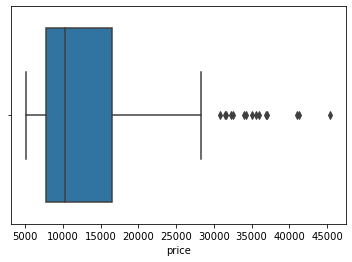

In [75]:
# boxplot of column "price" 
# There is outlier present in column "price "
sns.boxplot(x=df['price'])

In [76]:
# minimum of price
df.price.min()

5118.0

In [77]:
# maximum of price
df.price.max()

45400.0

In [78]:
# mean of price
df.price.mean()

13276.710570731706

In [79]:
# value count of price
df.price.value_counts()

5572.0     2
6692.0     2
7957.0     2
7898.0     2
6229.0     2
          ..
6377.0     1
30760.0    1
16925.0    1
15998.0    1
18920.0    1
Name: price, Length: 189, dtype: int64

In [80]:
# replacing the outliers with the mean 
df['price'] = df['price'].astype(str).str.replace('30700.000', '13276.710')
df['price'] = df['price'].astype(str).str.replace('41315.000', '13276.710')
df['price'] = df['price'].astype(str).str.replace('36880.000', '13276.710')
df['price'] = df['price'].astype(str).str.replace('32250.000', '13276.710')
df['price'] = df['price'].astype(str).str.replace('35550.000', '13276.710')
df['price'] = df['price'].astype(str).str.replace('36000.000', '13276.710')
df['price'] = df['price'].astype(str).str.replace('31600.000', '13276.710')
df['price'] = df['price'].astype(str).str.replace('34184.000', '13276.710')
df['price'] = df['price'].astype(str).str.replace('35056.000', '13276.710')
df['price'] = df['price'].astype(str).str.replace('49600.000', '13276.710')
df['price'] = df['price'].astype(str).str.replace('45400.000', '13276.710')
df['price'] = df['price'].astype(str).str.replace('35528.000', '13276.710')
df['price'] = df['price'].astype(str).str.replace('34028.000', '13276.710')
df['price'] = df['price'].astype(str).str.replace('37028.000', '13276.710')
df['price'] = df['price'].astype(str).str.replace('31400.500', '13276.710')
print(df.to_string())

     boreratio carlength carwidth  compressionratio enginesize citympg stroke horsepower highwaympg      price
0         3.47     168.8     64.1              22.1        130      21   69.2        111         27    13495.0
1         3.47     168.8     64.1              10.4        130      21   45.1        111         27    16500.0
2         2.68     171.2     65.5              12.0        152      19   69.3        154         26    16500.0
3         3.19     176.6     66.2              16.5        109      24   58.5        102         30    13950.0
4         3.19     176.6     66.4              17.9        136      18   58.4        115         22    17450.0
5         3.19     177.3     66.3               7.2        136      19   75.0        110         25    15250.0
6         3.19     192.7     71.4              11.8        136      19   23.5        110         25    17710.0
7         3.19     192.7     71.4              13.2        136      19   11.6        110         25    18920.0
8

Question 3-3Is there any relation between the independent variables. i.e. check for colinearity 
between the independent features and mention the independent features having colinearity.(With their scatterplots)

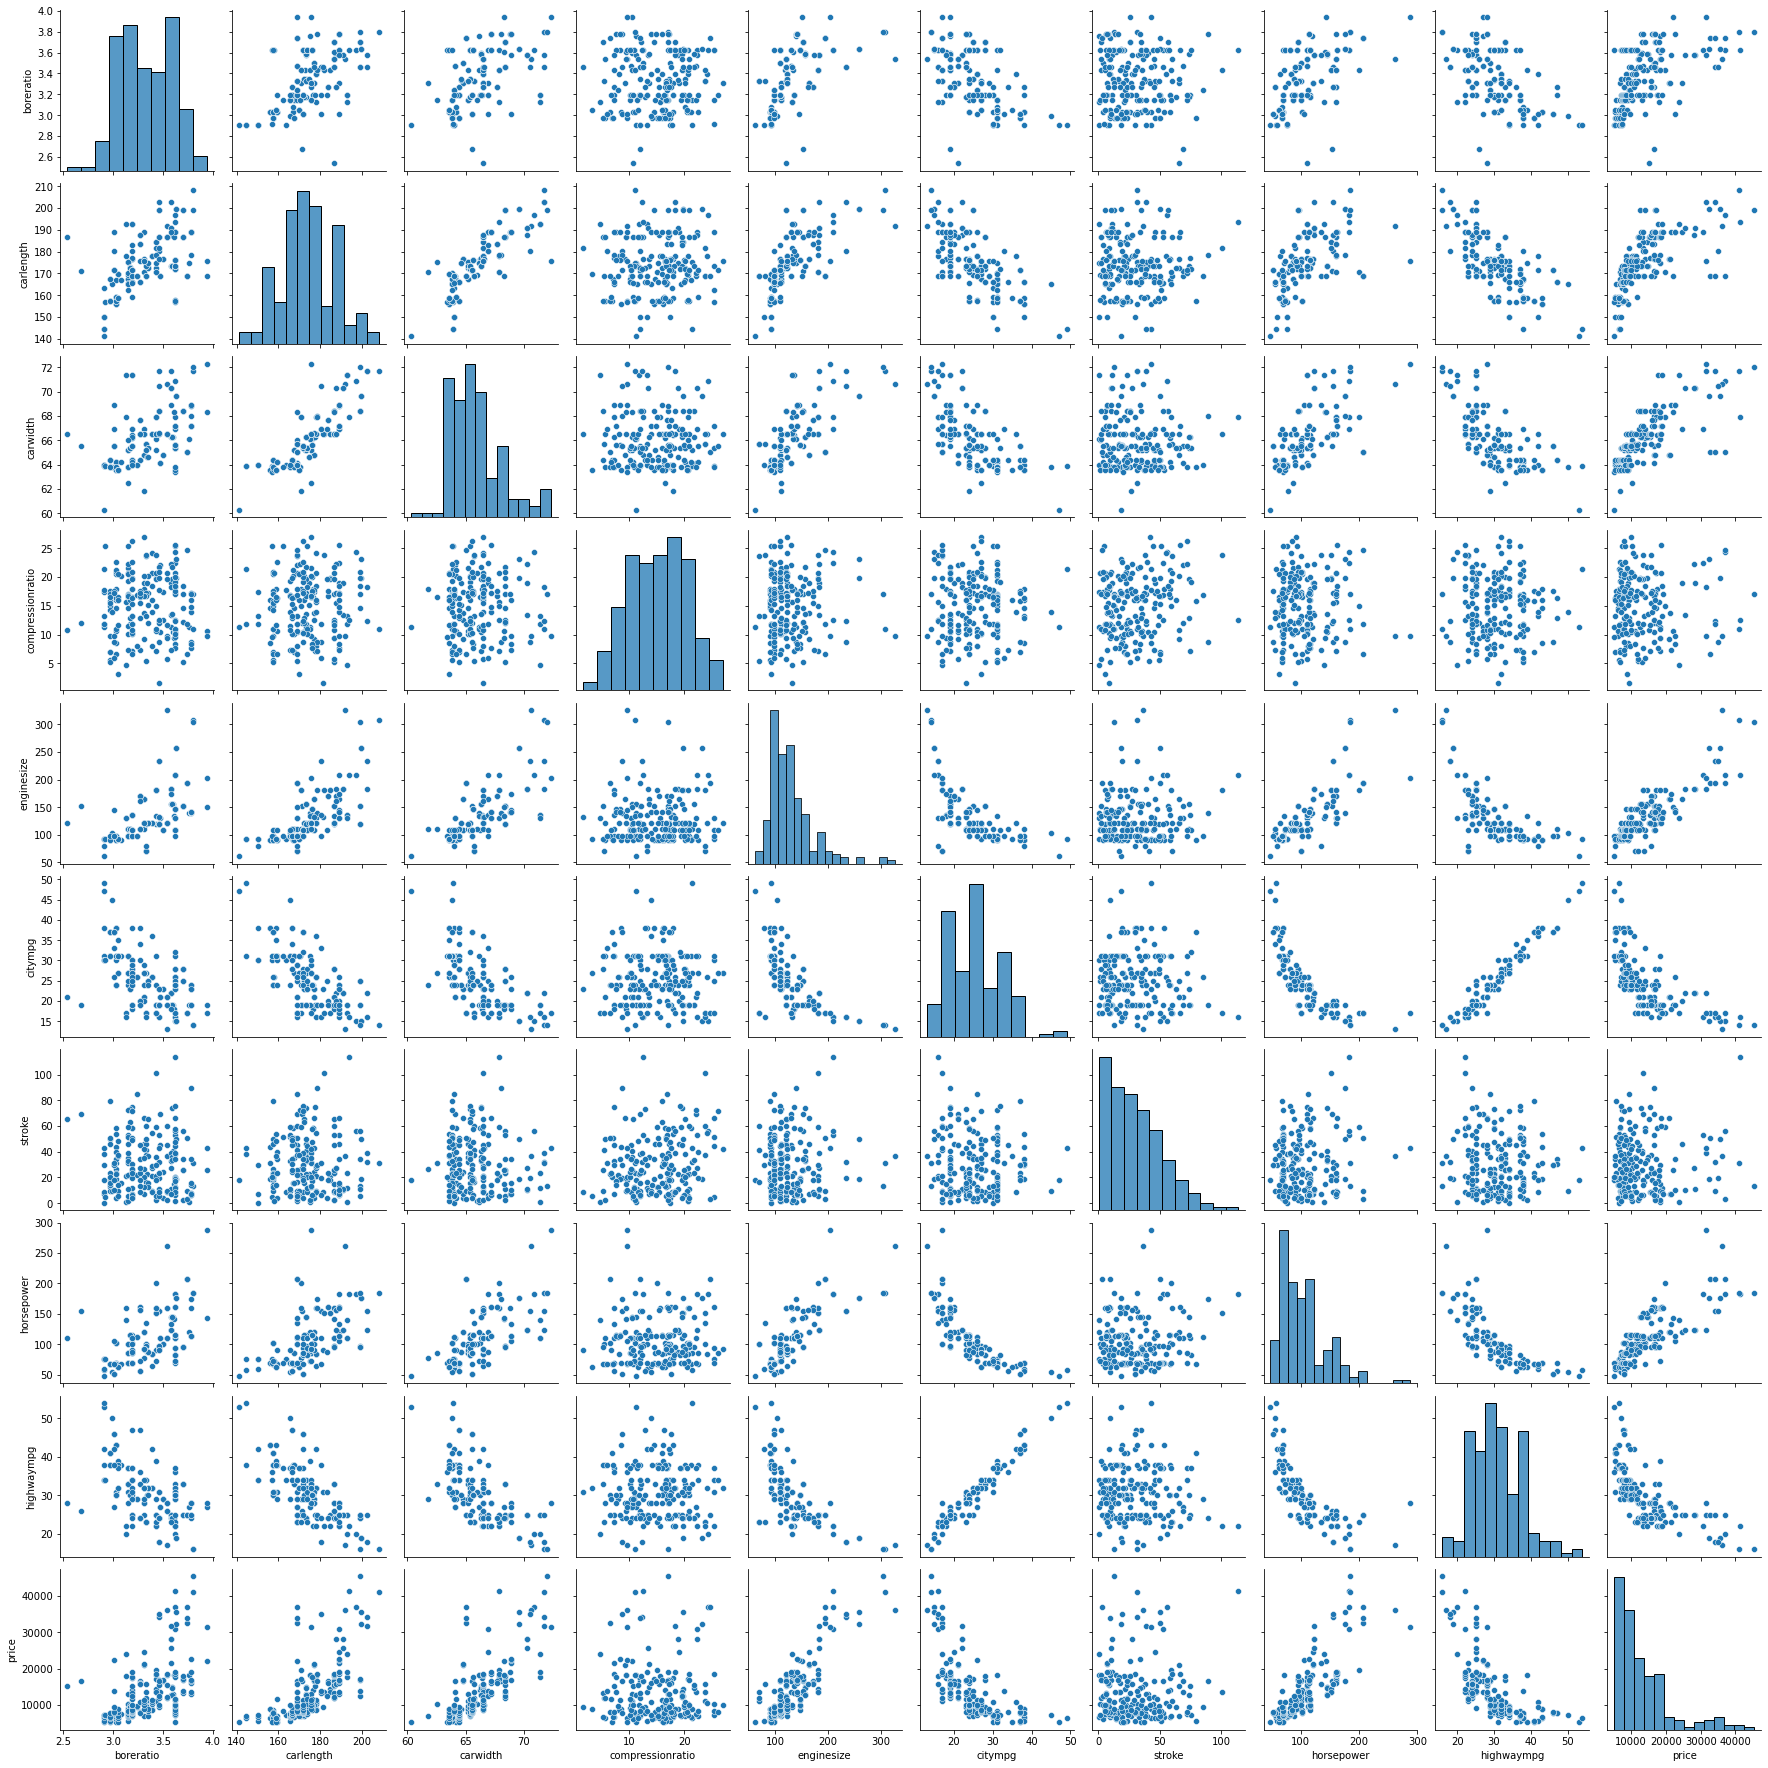

In [81]:
# using pairplot getting the colinearity b/w independent variables 
df=pd.read_csv("car_price1.csv")
sns.pairplot(df)

Question 3-4 Do a regression fit between 'enginesize' and plot the residual, do you see errors are gaussian distributed.
Use QQplot and histogram of residual to see it?

Text(0, 0.5, 'Residual')

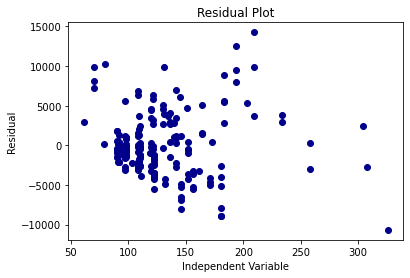

In [82]:
#4 Residual plot
X, y = df[['enginesize']], df.price
model = LinearRegression().fit(X, y)
y_predicted = model.predict(X)
residuals = y - y_predicted
plt.plot(X,residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")

-------------------------------------------------------------------------

<a id='question4'></a>
<font color='red' size=5>Question-4 (Hypothesis test)</font>

1. Lets assume the null hypothesis that there is no relation between 'enginesize' and 'price' as well as 'stroke' and 'price'. Will you accept this null hypothesis or reject it? Give a quantified statement in terms of p-value. 

Hint: Use statsmodel library

In [ ]:
# Implement your code here and add more cells if you need!

-------------------------------------------------------------------------

<a id='question5'></a>
<font color='red' size=5>Question-5 (Multivariate analysis)</font> 
1. Try to make a predictive model using all features as independent variable except 'price' which is a target variable. Here, use maximum 3 independent features except Intercept(constant) column to get R^2 value approximately 0.8
2. Give reasons for each and every independent feature that why you selected or rejected it for training model.

Question 5-1 Try to make a predictive model using all features as independent variable except 'price' 
which is a target variable. Here, use maximum 3 independent features except Intercept(constant) column 
to get R^2 value approximately 0.8

In [83]:
#1 R^2 value
model = LinearRegression()
X, y = df[['carwidth', 'horsepower', 'enginesize']], df.price
model.fit(X, y)
print("R2 score is",model.score(X, y))

R2 score is 0.8168786988384115


#2  The independent variables which are selected for training model is "carwidth", "horsepower", "enginesize" because
    these columns have maximum value of correlation wrt dependent variable that is why we selected these columns and 
    rejected others

-------------------------------------------------------------------------